## **The Lifestyle Factor: Smoking, BMI, and Your Premiums**


Insurance is a financial tool designed to provide individuals and families with protection against unexpected expenses. It operates on the principle of risk-sharing, where premiums paid by policyholders are pooled together to cover the costs of claims. Various factors influence the cost of insurance premiums, including an individual’s age, health status, lifestyle choices, and location. For example, smoking or having a higher body mass index may indicate increased health risks, leading to higher premiums. Similarly, factors like the number of dependents or the region where one lives can also impact costs due to differing risk profiles and regional healthcare expenses. By analyzing these factors, insurers can assess risks more accurately and structure policies that balance affordability with comprehensive coverage.

<div style="text-align: center;">
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTUZKDpL7z6T851CwzmTTDoeuuu9CD2dwM6Ag&s" width="400">
</div>

# Table of Contents
1. [Introduction](#1.Introduction)

   1.1. [Problem Statement](#1.1.Problem-Statement)  
   1.2. [Objectives](#1.2.Objectives)  
2. [Importing Packages](#2.Importing-Packages)  
3. [Importing The Dataset](#3.Import-Dataset)    
4. [Data Cleaning](#4.Data-Cleaning)  
5. [Exploratory Data Analysis (EDA)](#5.Exploratory-Data-Analysis)
6. [Findings](#6.Findings)



## **1.Introduction**

This analysis focuses on understanding factors influencing individual expenses, particularly in contexts where lifestyle, health metrics, and demographic characteristics intersect. Key variables of interest include age, gender, body mass index (BMI), smoking habits, number of dependents, and geographic location. By examining these elements, we aim to uncover patterns and relationships that drive variations in expenditures. Such insights are valuable for optimizing financial planning, health resource allocation, and policy design, especially in fields like insurance, healthcare, and wellness management.

### 1.1.Problem Statement

Insurance costs can differ a lot from person to person, depending on things like age, health, lifestyle choices, and where someone lives. However, figuring out how these factors work together to determine premiums can be complicated and often unclear for many people. This lack of transparency can make it harder for individuals to find affordable and fair insurance options.


### 1.2.Objectives


The goal is to dive deeper into these factors—like age, BMI, smoking habits, family size, and location—to understand how they influence insurance costs. By uncovering these patterns, we hope to provide insights that help make insurance more affordable, and give people the tools they need to make better decisions about their coverage.

## **2.Importing Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

import warnings

warnings.filterwarnings("ignore")

## **3.Import Dataset**

In [2]:
# Load the dataset
df = pd.read_csv("insurance.csv")

# Display the first 5 rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Get an overview of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [4]:
# Summary statistics for numerical columns
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


## 

## **4.Data Cleaning**

#### *4.1.Handeling missing values*

In [5]:
# Check if there are any missing values in the DataFrame
missing_values = df.isnull().sum()

# Print the missing values count for each column
print(missing_values)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


    - There are no missing values in the dataset.

#### *4.2.Check for duplicates*

In [6]:
# Check for duplicate rows in the DataFrame
duplicates = df.duplicated().sum()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates}")
print()
print(df[df.duplicated()])

# Remove duplicates 
df.drop_duplicates(inplace=True)

Number of duplicate rows: 1

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


## **5.Exploratory Data Analysis**

#### *5.1.Univariate Analysis*

Outliers for column: age
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


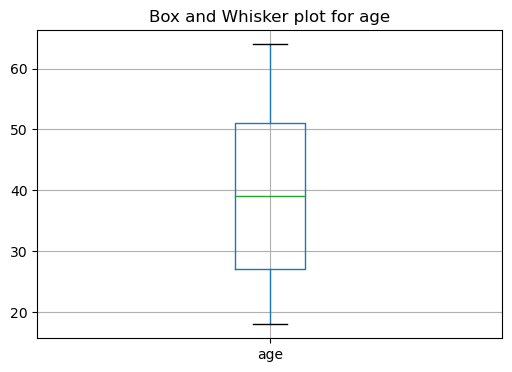

Outliers for column: bmi
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


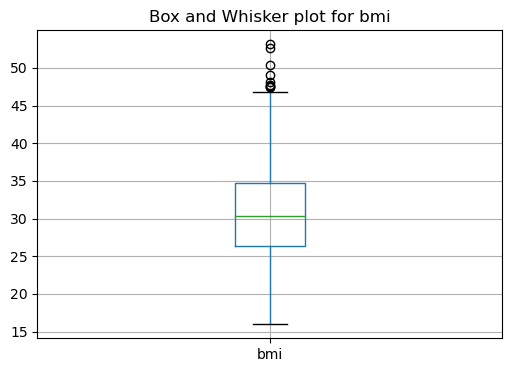

Outliers for column: children
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


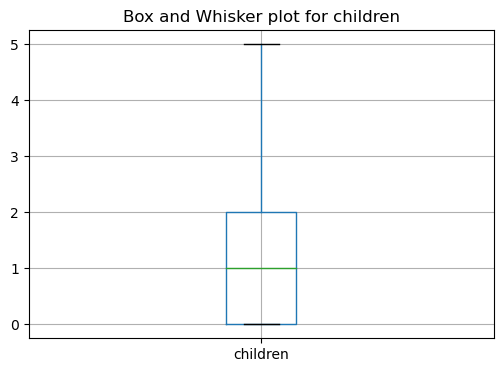

Outliers for column: charges
      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[139 rows x 7 columns]


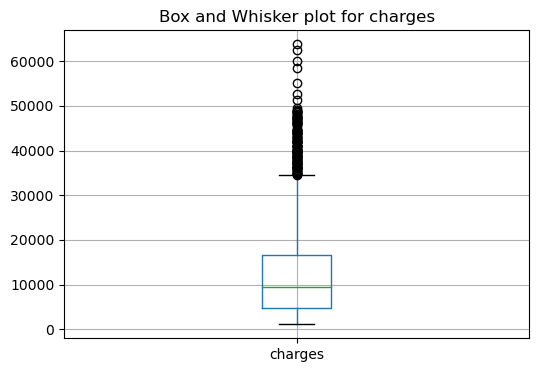

In [7]:
def detect_outliers_iqr(df, column):
    # Calculate the first and third quartiles (Q1 and Q3)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the outliers (values below the lower bound or above the upper bound)
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers

# Loop through each column and calculate outliers for numeric columns
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    print(f"Outliers for column: {column}")
    outliers = detect_outliers_iqr(df, column)
    print(outliers)
    
    # Plotting box plot for each numeric column
    plt.figure(figsize=(6, 4))
    df.boxplot(column=column)
    plt.title(f'Box and Whisker plot for {column}')
    plt.show()

    - A BMI outlier range of 47 - 53, while rare, is not unrealistic and falls within the range of extreme obesity, which can be associated with significant health risks and higher medical costs.
    - The high outliers for charges are also plausible in the context of health insurance, as they may reflect individuals with higher BMI, smokers, or those with frequent medical incidents. These factors could lead to substantially higher charges.

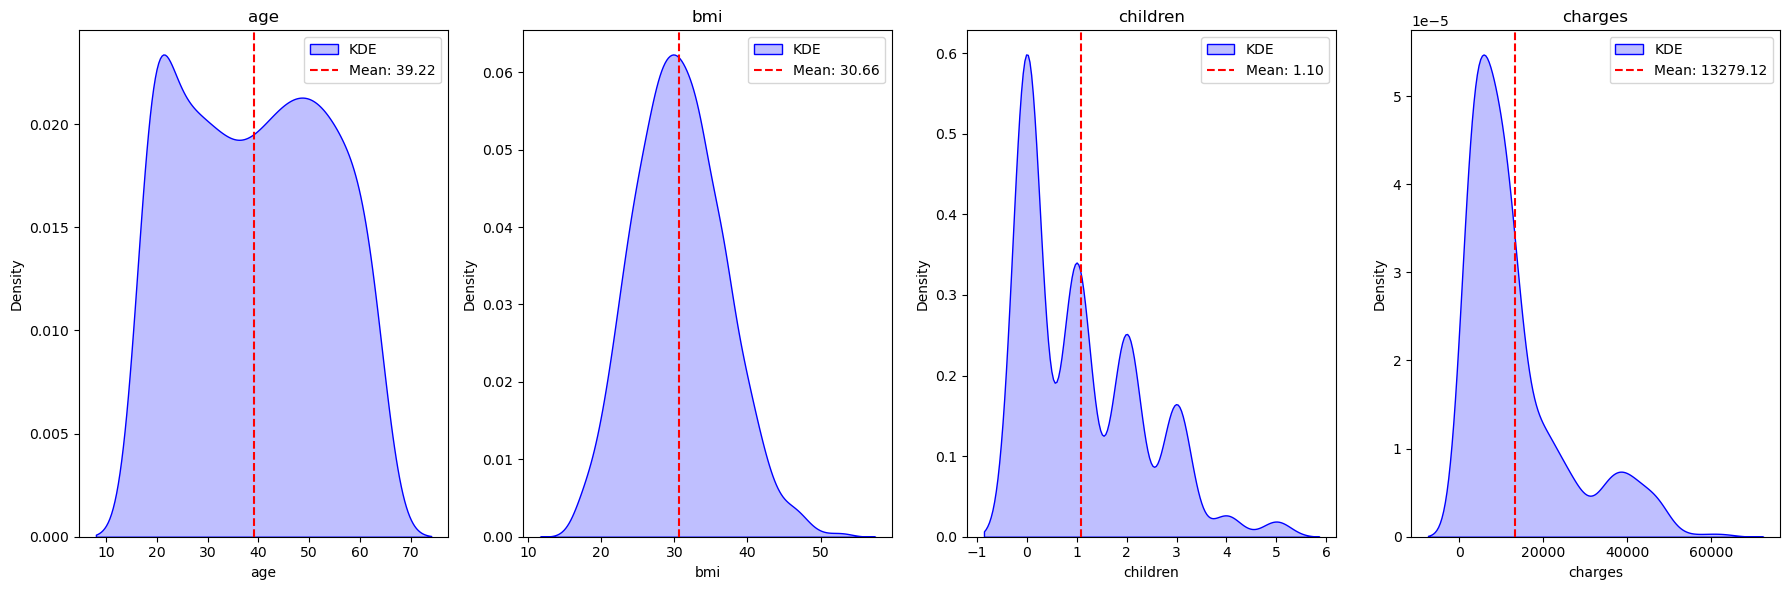

In [8]:

# Numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create subplots
fig, axes = plt.subplots(1, len(numeric_columns), figsize=(18, 6))

# Plot KDE for each numeric column
for i, column in enumerate(numeric_columns):
    sns.kdeplot(df[column], shade=True, color="blue", label="KDE", ax=axes[i])
    axes[i].axvline(df[column].mean(), color='red', linestyle='--', label=f'Mean: {df[column].mean():.2f}')
    axes[i].set_title(f'{column}')
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

__Age__
- The distribution is bimodal, with two noticeable peaks, indicating two common age groups in the dataset.
- The density suggests that there are fewer individuals at extreme ages (younger than 15 or older than 65

__BMI__
- The data is slightly right-skewed because there are more people with higher BMI

__Children__
- follows a discrete distribution pattern,The distribution is right-skewed since most people have fewer children, and fewer have more than 2.

__Charges__
- This pattern suggests that most people pay relatively small charges, but some have significantly high expenses indicating a positively skewed distribution.

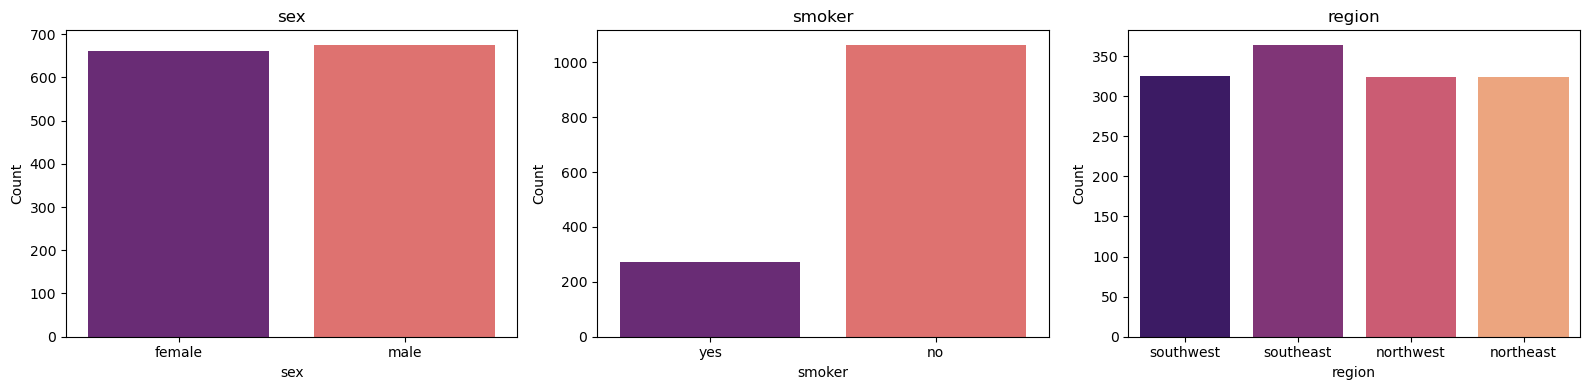

In [9]:
# Categorical columns for count plot
categorical_columns = df.select_dtypes(include=['object']).columns

# Create subplots for all categorical columns
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(16, 4))

# Plot Count Plot for categorical columns
for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], ax=axes[i],palette='magma')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

__Sex__
- The dataset has a balanced number of males and females, making the analysis unbiased.

__Smoker__
- Most individuals in the dataset are non-smokers

__Region__
- Each region has a similar number of people, ensuring a fair and even analysis

### *5.2.Multivariate Analysis*

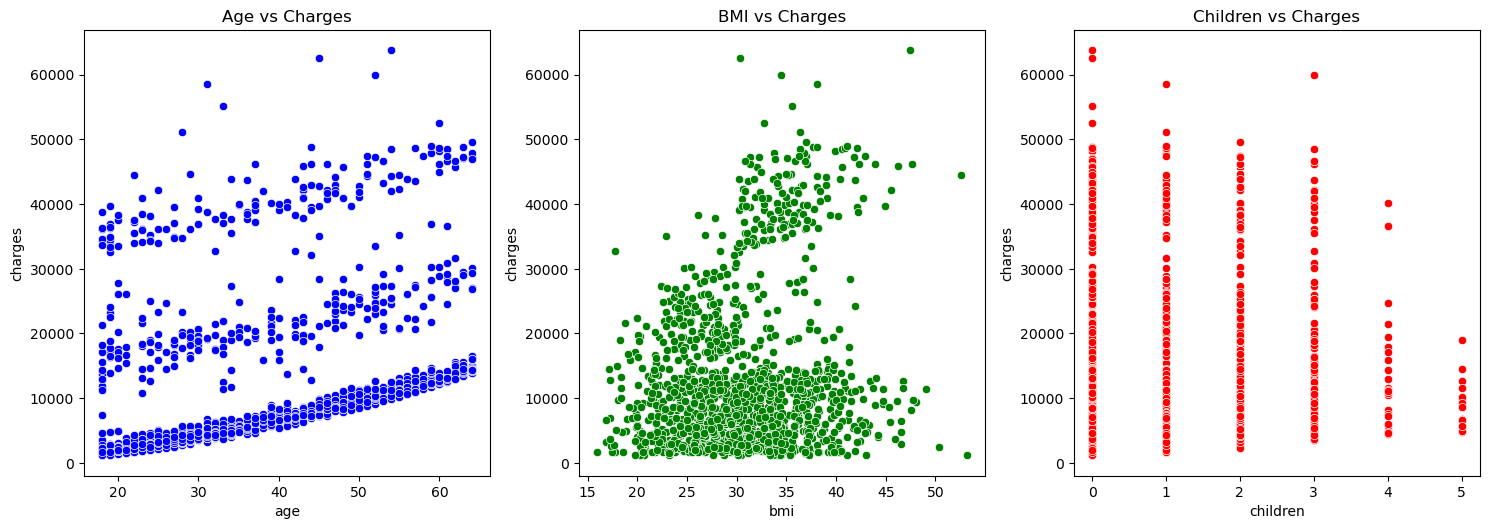

In [10]:


# Create a figure with multiple subplots
plt.figure(figsize=(15, 10))

# Scatter plot for 'age' vs 'charges'
plt.subplot(2, 3, 1)
sns.scatterplot(x='age', y='charges', data=df, color='blue')
plt.title('Age vs Charges')

# Scatter plot for 'bmi' vs 'charges'
plt.subplot(2, 3, 2)
sns.scatterplot(x='bmi', y='charges', data=df, color='green')
plt.title('BMI vs Charges')

# Scatter plot for 'children' vs 'charges'
plt.subplot(2, 3, 3)
sns.scatterplot(x='children', y='charges', data=df, color='red')
plt.title('Children vs Charges')


# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()

__Age vs. Charges__
- The pattern suggests a positive correlation between age and insurance charges, However, the points are scattered, indicating other factors might also influence charges.

__BMI vs. Charges__
- The data shows that individuals with higher BMI values tend to incur higher charges, particularly beyond a BMI of 30, although other factors might also influnce charges

__Children vs. Charges__
- There doesn’t appear to be a strong correlation between the number of children and insurance charges

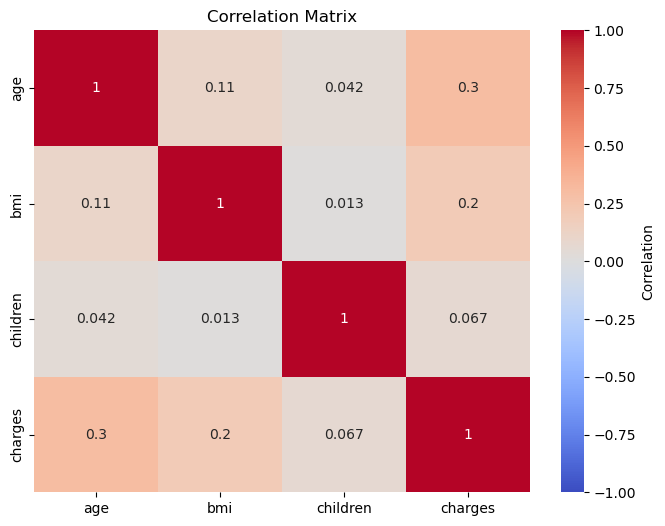

In [11]:
numeric_df = df.select_dtypes(include='number')

corr_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation'}, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

    -none of the variables have strong correlations with each other, indicating that each variable is relatively independent in relation to the others, though age and charges show a moderate positive correlation

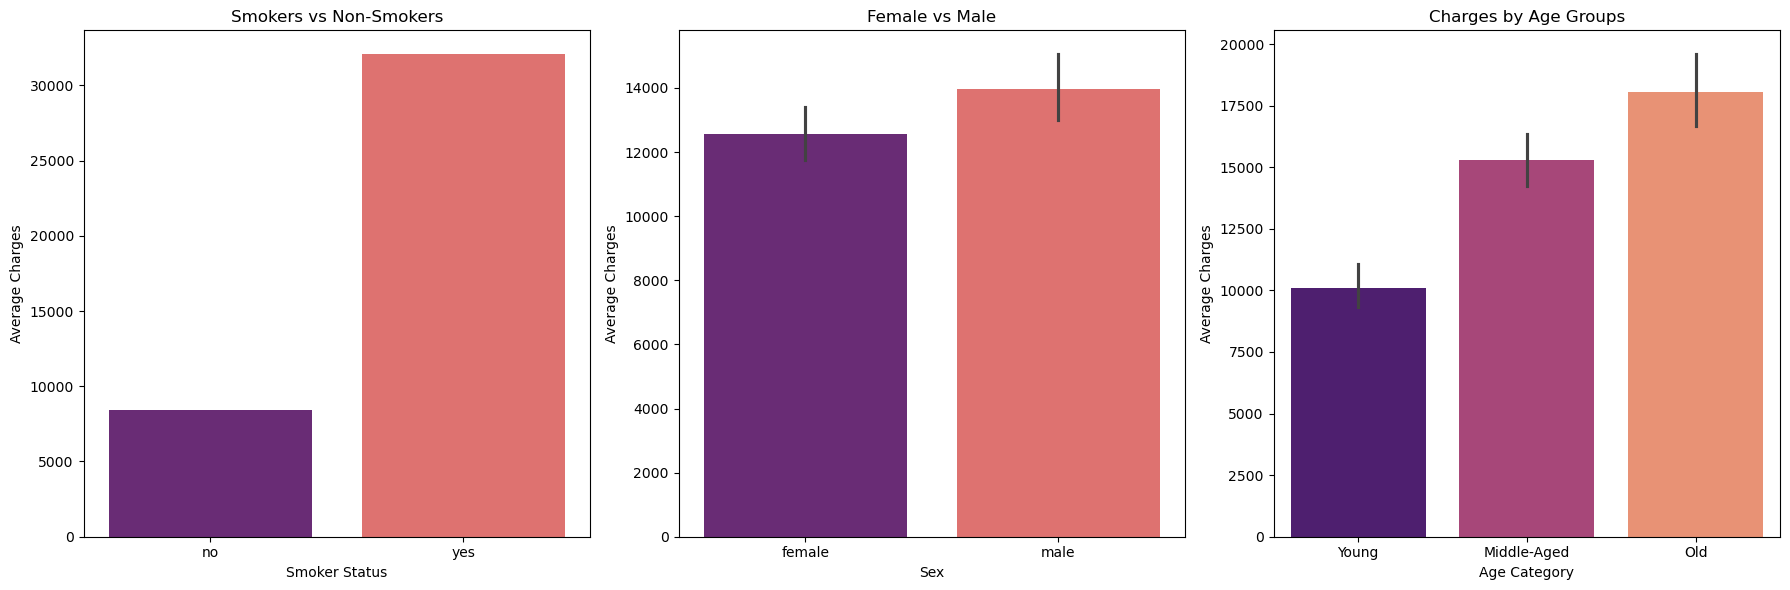

In [12]:
avg_charges = df.groupby('smoker')['charges'].mean().reset_index()


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Smokers vs Non-Smokers
sns.barplot(x='smoker', y='charges', data=avg_charges, palette='magma', ax=axes[0])
axes[0].set_title('Smokers vs Non-Smokers')
axes[0].set_xlabel('Smoker Status')
axes[0].set_ylabel('Average Charges')

# Plot 2: Female vs Male
sns.barplot(x='sex', y='charges', data=df, palette='magma', ax=axes[1])
axes[1].set_title('Female vs Male')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Average Charges')


def age_categorize(age):
    if age < 39:
        return 'Young'
    elif 40 <= age <= 55:
        return 'Middle-Aged'
    else:
        return 'Old'
    
df_copy = df.copy()

df_copy['age category'] = df_copy['age'].apply(age_categorize)

# Plot 3: Charges by Age Groups
sns.barplot(x='age category', y='charges', data=df_copy, palette='magma', ax=axes[2])
axes[2].set_title('Charges by Age Groups')
axes[2].set_xlabel('Age Category')
axes[2].set_ylabel('Average Charges')

# Adjust layout to prevent overlapping of plots
plt.tight_layout()
plt.show()

__Smokers vs Non-Smokers__
- Smokers generally incur significantly higher insurance charges compared to non-smokers. This difference is likely due to the increased health risks associated with smoking, which leads to higher medical costs. Insurance companies often adjust premiums based on the likelihood of health issues, and smokers tend to have a higher risk of developing chronic conditions such as lung disease, heart disease, and cancers, all of which contribute to higher healthcare expenditures

__Female vs Males__
- it seems as though males tend to have slight higher chargers than females

__Charges by Age Groups__
- It is evident that younger individuals tend to have the lowest insurance charges, followed by middle-aged adults, with older individuals facing the highest premiums. The positive correlation between age and insurance charges highlights a crucial trend: as people age, they become more susceptible to chronic health conditions, which inevitably leads to increased healthcare costs. This growing vulnerability to medical issues translates into higher insurance premiums, as insurers adjust their pricing to account for the escalating risks associated with aging


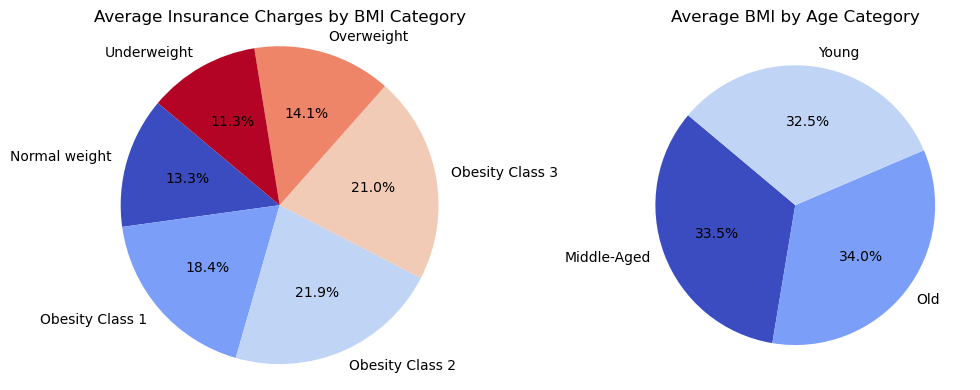

In [13]:
# BMI categorization function
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal weight'
    elif 25 <= bmi <= 29.9:
        return 'Overweight'
    elif 30 <= bmi <= 34.9:
        return 'Obesity Class 1'
    elif 35 <= bmi <= 39.9:
        return 'Obesity Class 2'
    else:
        return 'Obesity Class 3'

# Apply the BMI categorization function to the 'bmi' column
df_copy['bmi_category'] = df_copy['bmi'].apply(categorize_bmi)

# Create a new dataframe with the relevant columns
columns = ['charges', 'bmi_category']
bmi_df = df_copy[columns]

# Group by BMI category and calculate the average charges
bmi_charges_avg = bmi_df.groupby('bmi_category')['charges'].mean()

# Get colors from the 'magma' colormap for the pie chart
cmap = plt.cm.coolwarm
colors = cmap(np.linspace(0, 1, len(bmi_charges_avg)))

# Create the subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot 1: Pie Chart plot
axes[0].pie(bmi_charges_avg, labels=bmi_charges_avg.index, autopct='%1.1f%%', startangle=140, colors=colors)
axes[0].set_title('Average Insurance Charges by BMI Category')
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


# Calculate average BMI by age category
avg_bmi_by_age_category = df_copy.groupby('age category')['bmi'].mean()

# Plot 2: Pie chart plot
axes[1].pie(avg_bmi_by_age_category, labels=avg_bmi_by_age_category.index, autopct='%1.1f%%', startangle=140, colors=colors)
axes[1].set_title('Average BMI by Age Category')

# Adjust layout to prevent overlapping of plots
plt.tight_layout()
plt.show()

__Insurance Charges by BMI__
- Obese individuals tend to have higher premiums compared to those of normal weight, which makes sense given the increased health risks they face. However, it's surprising that underweight people often pay the lowest premiums. This may be due to the common misconception that being underweight is a lesser health risk, despite the fact that it can lead to a range of issues like malnutrition, weakened immunity, and increased vulnerability to illness. Insurance companies, however, might not fully account for these risks, resulting in underweight individuals paying less. It's a curious case of the overlooked dangers of being too light on the scale!

__Average BMI By Age Category__
- Dependents across all age groups tend to have a similar average BMI distribution.

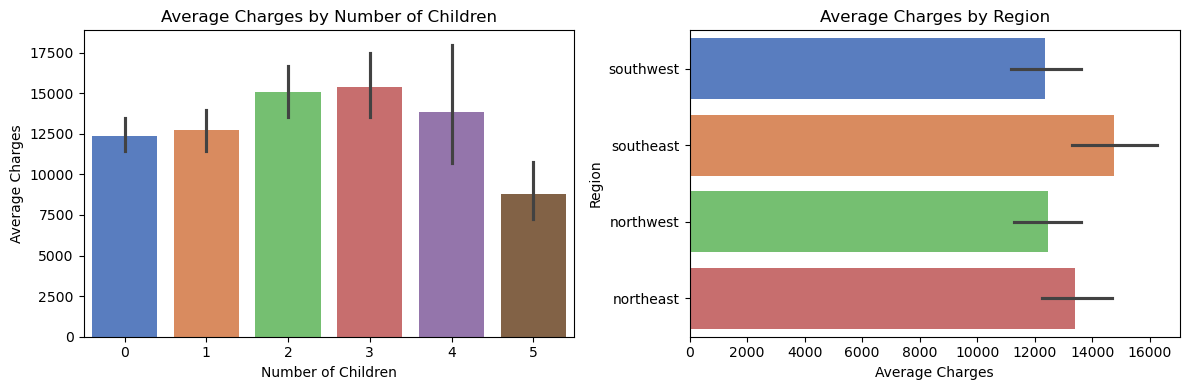

In [14]:
avg_charges_by_children = df.groupby('children')['charges'].mean()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# First plot: Average Charges by Number of Children
sns.barplot(x='children', y='charges', data=df, palette='muted', ax=axes[0])
axes[0].set_title('Average Charges by Number of Children')
axes[0].set_xlabel('Number of Children')
axes[0].set_ylabel('Average Charges')
axes[0].tick_params(axis='x', rotation=0)

# Second plot: Average Charges by Region using seaborn
sns.barplot(y='region', x='charges', data=df, palette='muted', ax=axes[1])
axes[1].set_title('Average Charges by Region')
axes[1].set_xlabel('Average Charges')
axes[1].set_ylabel('Region')
axes[1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

__Average Charges By Number of Children__
- As shown in the scatter plots above, there is no correlation between the number of children and charges. Interestingly, dependents with five children appear to pay the least in charges, which logically seems unexpected. However, this does not prove anything, as other factors may be influencing these results. 

__Average Charges by Region__
- Buying power can vary significantly across different regions due to factors such as local cost of living, average income levels, and economic conditions.This means that while healthcare charges may be higher in one region, individuals in that region might also have higher overall income or a greater ability to afford those costs
- It’s important to account for these differences when analyzing data across regions, as it might give a more accurate understanding of how healthcare expenses are distributed. Simply comparing average charges across regions without considering the economic context might not provide a fair or complete picture of the situation.

## **6.Findings**

The analysis highlights key factors influencing premium rates among dependents:

- __Smoking Status__: Dependents who smoke tend to incur higher premiums compared to non-smokers.
- __Weight Status__: Obese dependents are associated with higher premiums compared to those with normal weight.
- __Age Groups:__ Dependents in older age groups consistently show the highest premiums compared to other age groups.

These insights emphasize the importance of lifestyle and demographic factors in determining insurance premiums, providing opportunities to tailor strategies for risk management and premium optimization.